# Histograms
- try to do regresion for F10.7 and look at the residuals

In [24]:
%matplotlib inline

In [25]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [26]:
Half_orbit = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/half_orbit_means.pkl')

In [4]:
Half_orbit.head()

,Density_norm,FAC,FAC_power,Density,Altitude,Orbit_nr,Hemisphere,AP_INDEX,Kp,F10_INDEX,BY_GSM,BZ_GSM,Bulk_speed,F10_Mean,PyAmps
2015-01-02 00:50:50,5.932167e-13,0.104478,0.284759,6.468488e-13,464222.287865,1.0,1.0,15.0,3.0,141.0,-1.0,-2.1,433.0,129.029218,1.769016
2015-01-02 01:37:45,7.720531e-13,0.139248,0.372618,6.987142e-13,475492.964700,1.0,-1.0,15.0,3.0,141.0,-0.6,-1.7,433.0,129.032511,2.962752
2015-01-02 02:24:40,5.577984e-13,0.113231,0.390340,6.089699e-13,464224.157119,2.0,1.0,15.0,3.0,141.0,-2.2,-2.4,434.0,129.035803,1.880936
2015-01-02 03:11:35,7.597623e-13,0.181961,0.565810,6.858343e-13,475506.057772,2.0,-1.0,4.0,1.0,141.0,-3.0,-2.3,433.0,129.039095,4.111182
2015-01-02 03:58:30,5.691719e-13,0.075313,0.165567,6.237317e-13,464035.397442,3.0,1.0,4.0,1.0,141.0,-3.0,-2.3,433.0,129.039095,1.841245


In [5]:
active = Half_orbit[Half_orbit.Kp >= 4]
quiet =  Half_orbit[Half_orbit.Kp < 4]

## ALL DATA

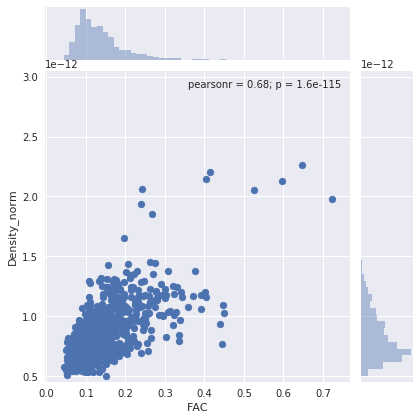

In [6]:
sns.jointplot("FAC", "Density_norm", Half_orbit[Half_orbit.Hemisphere==1], ylim=[Half_orbit.Density_norm.min()*0.9,Half_orbit.Density_norm.max()*1.1]);

In [10]:
sns.lmplot?

In [20]:
Half_orbit[(Half_orbit.Density_norm<1.5*10**-12) &(Half_orbit.FAC>0.6)]

,Density_norm,FAC,FAC_power,Density,Altitude,Orbit_nr,Hemisphere,AP_INDEX,Kp,F10_INDEX,BY_GSM,BZ_GSM,Bulk_speed,F10_Mean,PyAmps
2015-01-07 09:49:55,1.392264e-12,0.686514,1.783749,1.232329e-12,475214.005738,68.0,-1.0,94.0,6.3,142.399994,5.2,-17.4,469.0,128.644445,16.66029


In [22]:
Half_orbit[(Half_orbit.Density_norm<2*10**-12) &(Half_orbit.FAC>0.7)]

,Density_norm,FAC,FAC_power,Density,Altitude,Orbit_nr,Hemisphere,AP_INDEX,Kp,F10_INDEX,BY_GSM,BZ_GSM,Bulk_speed,F10_Mean,PyAmps
2015-03-17 16:00:20,1.978391e-12,0.722576,1.718321,1.986287e-12,461355.735217,459.0,1.0,179.0,7.7,113.199997,5.6,-15.8,606.0,138.779835,18.188213


In [ ]:
Half_orbit[(Half_orbit.Density_norm>2.5*10**-12) &(Half_orbit.FAC<0.3)]

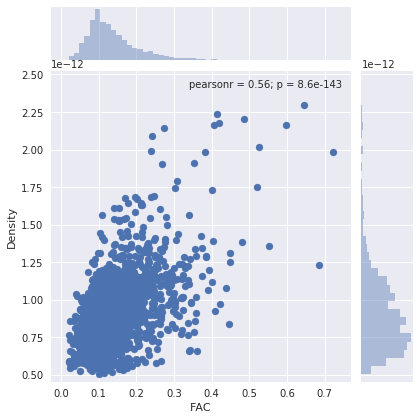

In [13]:
sns.jointplot("FAC", "Density", Half_orbit, ylim=[Half_orbit.Density.min()*0.9,Half_orbit.Density.max()*1.1]);

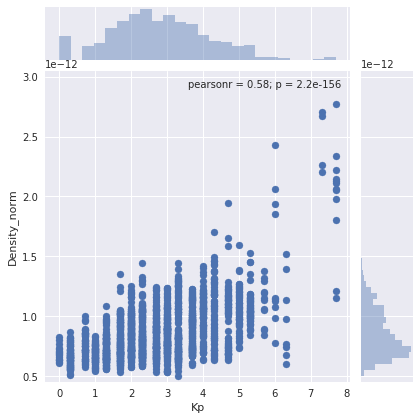

In [15]:
sns.jointplot("Kp", "Density_norm", Half_orbit, ylim=[Half_orbit.Density_norm.min()*0.9,Half_orbit.Density_norm.max()*1.1]);

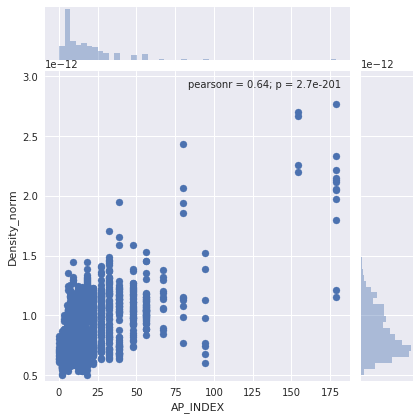

In [16]:
sns.jointplot("AP_INDEX", "Density_norm", Half_orbit, ylim=[Half_orbit.Density_norm.min()*0.9,Half_orbit.Density_norm.max()*1.1]);

## Active periodes

In [14]:
len(active)

370

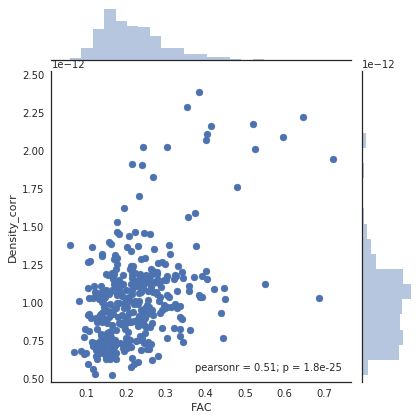

In [15]:
with sns.axes_style('white'):
    sns.jointplot("FAC", "Density_corr", active,ylim=[active.Density.min()*0.9,active.Density.max()*1.1]);

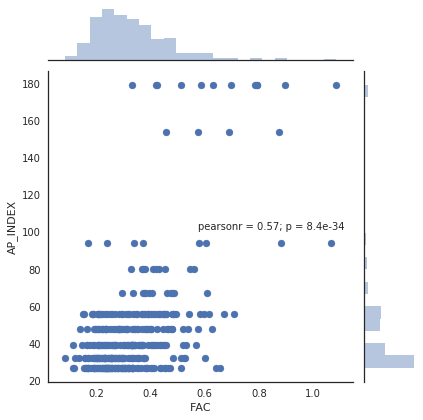

In [9]:
with sns.axes_style('white'):
    sns.jointplot("FAC", "AP_INDEX", active);

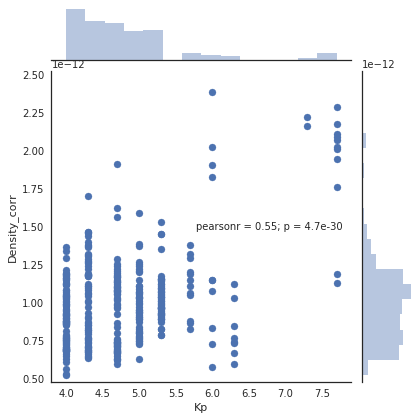

In [19]:
with sns.axes_style('white'):
    sns.jointplot("Kp","Density_corr", active, ylim=[active.Density.min()*0.9,active.Density.max()*1.1]);

## Log(FAC) & log(density)

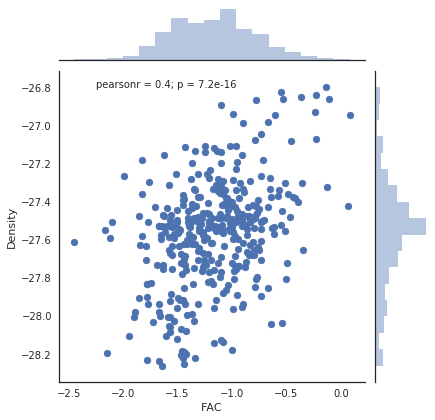

In [11]:
with sns.axes_style('white'):
    sns.jointplot(active.FAC.apply(np.log), active.Density.apply(np.log));

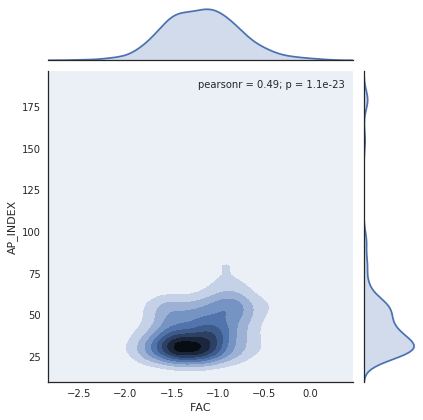

In [12]:
with sns.axes_style('white'):
    sns.jointplot(active.FAC.apply(np.log), active.AP_INDEX,kind='kde');

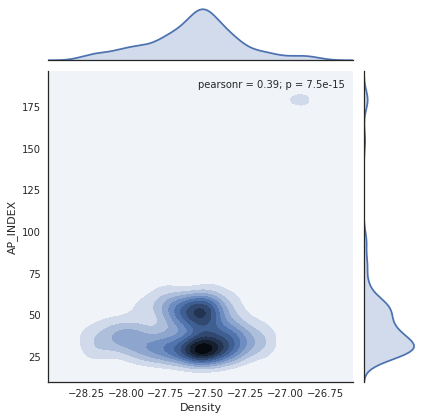

In [13]:
with sns.axes_style('white'):
    sns.jointplot( active.Density.apply(np.log),active.AP_INDEX,kind='kde');

## Quite periodes

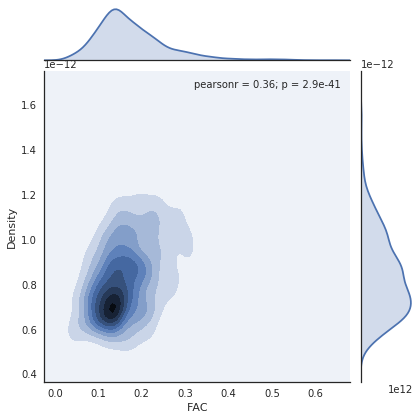

In [14]:
with sns.axes_style('white'):
    sns.jointplot("FAC", "Density", quiet, kind='kde');

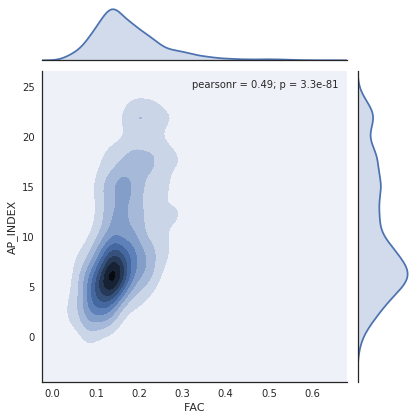

In [15]:
with sns.axes_style('white'):
    sns.jointplot("FAC", "AP_INDEX", quiet, kind='kde');

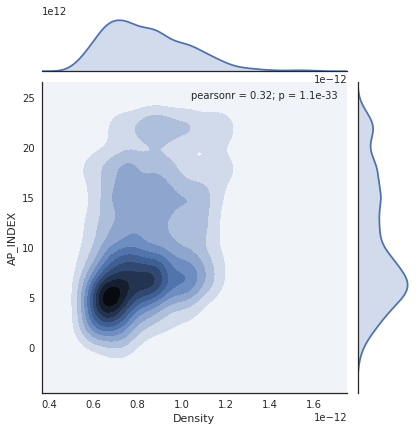

In [16]:
with sns.axes_style('white'):
    sns.jointplot("Density", "AP_INDEX", quiet, kind='kde');